<a href="https://colab.research.google.com/github/toaharahmanratul/An-Interpretable-Framework-for-Predicting-Type-2-Diabetes-using-ML-and-Explainable-AI/blob/main/Interpretable_Framework_ML_XAI_Prima_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c618a9201b7c13adc67998f32e5992d7f7e12e87cc35d9e516fbafa3c99e96a6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import shap
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
dataset=pd.read_csv('/content/diabetes_PIMA_preprocessed.csv')
dataset.shape
dataset.head(30)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148           72.0           35.0        0  33.6   
1             1       85           66.0           29.0        0  26.6   
2             1       89           66.0           23.0       94  28.1   
3             0      137           40.0           35.0      168  43.1   
4             3       78           50.0           32.0       88  31.0   
5             2      197           70.0           45.0      543  30.5   
6             1      189           60.0           23.0      846  30.1   
7             5      166           72.0           19.0      175  25.8   
8             0      118           84.0           47.0      230  45.8   
9             1      103           30.0           38.0       83  43.3   
10            1      115           70.0           30.0       96  34.6   
11            3      126           88.0           41.0      235  39.3   
12            9      119           80.0           35.0        0  29.0   
13           11      143           94.0           33.0      146  36.6   
14           10      125           70.0           26.0      115  31.1   
15            1       97           66.0           15.0      140  23.2   
16           13      145           82.0           19.0      110  22.2   
17            5      109           75.0           26.0        0  36.0   
18            3      158           76.0           36.0      245  31.6   
19            3       88           58.0           11.0       54  24.8   
20           10      122           78.0           31.0        0  27.6   
21            4      103           60.0           33.0      192  24.0   
22            9      102           76.0           37.0        0  32.9   
23            2       90           68.0           42.0        0  38.2   
24            4      111           72.0           47.0      207  37.1   
25            3      180           64.0           25.0       70  34.0   
26            7      106           92.0           18.0        0  22.7   
27            9      171          110.0           24.0      240  45.4   
28            0      180           66.0           39.0        0  42.0   
29            2       71           70.0           27.0        0  28.0   

    DiabetesPedigreeFunction  Age  diabetic/non-diabetic  
0                      0.627   50                      1  
1                      0.351   31                      0  
2                      0.167   21                      0  
3                      2.288   33                      1  
4                      0.248   26                      1  
5                      0.158   53                      1  
6                      0.398   59                      1  
7                      0.587   51                      1  
8                      0.551   31                      1  
9                      0.183   33                      0  
10                     0.529   32                      1  
11                     0.704   27                      0  
12                     0.263   29                      1  
13                     0.254   51                      1  
14                     0.205   41                      1  
15                     0.487   22                      0  
16                     0.245   57                      0  
17                     0.546   60                      0  
18                     0.851   28                      1  
19                     0.267   22                      0  
20                     0.512   45                      0  
21                     0.966   33                      0  
22                     0.665   46                      1  
23                     0.503   27                      1  
24                     1.390   56                      1  
25                     0.271   26                      0  
26                     0.235   48                      0  
27                     0.721   54                      1  
28                     1.893 

In [ ]:
y=dataset['diabetic/non-diabetic']
percent_pos = sum(y)/len(y)
print('PIMA Percentage Diabetes cases %.02f %%' %(percent_pos * 100))
print('PIMA Percentage non Diabetes cases  %d %.02f%%  %d  %.02f%% ' %
      (sum(y) , percent_pos * 100,  len(y) - sum(y), (1-percent_pos)*100 ))
dataset.columns


PIMA Percentage Diabetes cases 33.33 %
PIMA Percentage non Diabetes cases  179 33.33%  358  66.67% 


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'diabetic/non-diabetic'],
      dtype='object')

FRAMEWORK:SCIKITLEARN

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve,f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit


from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
diabetic/non-diabetic       0
dtype: int64

In [ ]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder

data_analysis = dataset
le = LabelEncoder()
for col in data_analysis.columns:
    data_analysis[col] = le.fit_transform(data_analysis[col])

In [ ]:
corr=data_analysis.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.130658       0.205070       0.108586   
Glucose                      0.130658  1.000000       0.224426       0.213172   
BloodPressure                0.205070  0.224426       1.000000       0.243507   
SkinThickness                0.108586  0.213172       0.243507       1.000000   
Insulin                      0.001839  0.466816       0.003328       0.142502   
BMI                          0.032933  0.243307       0.314745       0.680528   
DiabetesPedigreeFunction     0.035209  0.146158       0.016978       0.087717   
Age                          0.647630  0.282815       0.353838       0.153656   
diabetic/non-diabetic        0.256649  0.491473       0.188326       0.257558   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.001839  0.032933                  0.035209   
Glucose                   0.466816  0.243307                  0.146158   
BloodPressure             0.003328  0.314745                  0.016978   
SkinThickness             0.142502  0.680528                  0.087717   
Insulin                   1.000000  0.212622                  0.172107   
BMI                       0.212622  1.000000                  0.129938   
DiabetesPedigreeFunction  0.172107  0.129938                  1.000000   
Age                       0.073298  0.098864                  0.093055   
diabetic/non-diabetic     0.218916  0.303252                  0.240105   

                               Age  diabetic/non-diabetic  
Pregnancies               0.647630               0.256649  
Glucose                   0.282815               0.491473  
BloodPressure             0.353838               0.188326  
SkinThickness             0.153656               0.257558  
Insulin                   0.073298               0.218916  
BMI                       0.098864               0.303252  
DiabetesPedigreeFunction  0.093055               0.240105  
Age                       1.000000               0.324894  
diabetic/non-diabetic     0.324894               1.000000

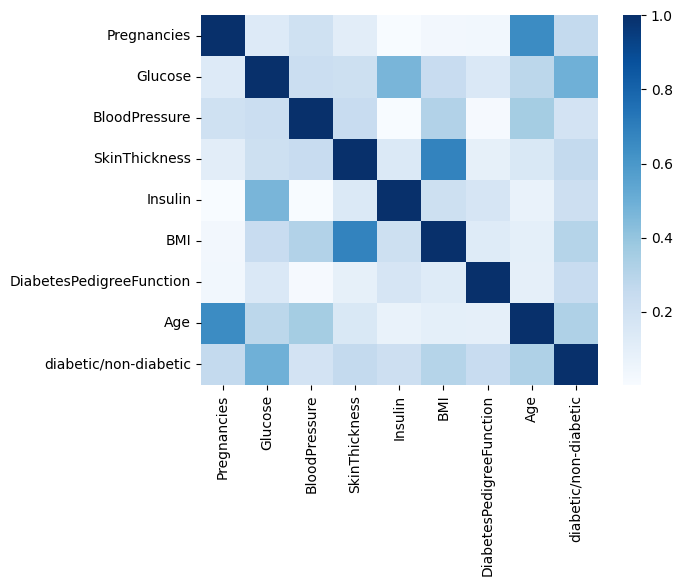

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data_analysis.corr()
sns.heatmap(corr,annot = False, cmap='Blues')
plt.savefig("Figure9b.png", format = 'png', dpi=1200,  bbox_inches='tight')

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Pregnancies'),
  Text(2, 0, 'Glucose'),
  Text(3, 0, 'BloodPressure'),
  Text(4, 0, 'SkinThickness'),
  Text(5, 0, 'Insulin'),
  Text(6, 0, 'BMI'),
  Text(7, 0, 'DiabetesPedigreeFunction'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'diabetic/non-diabetic')])

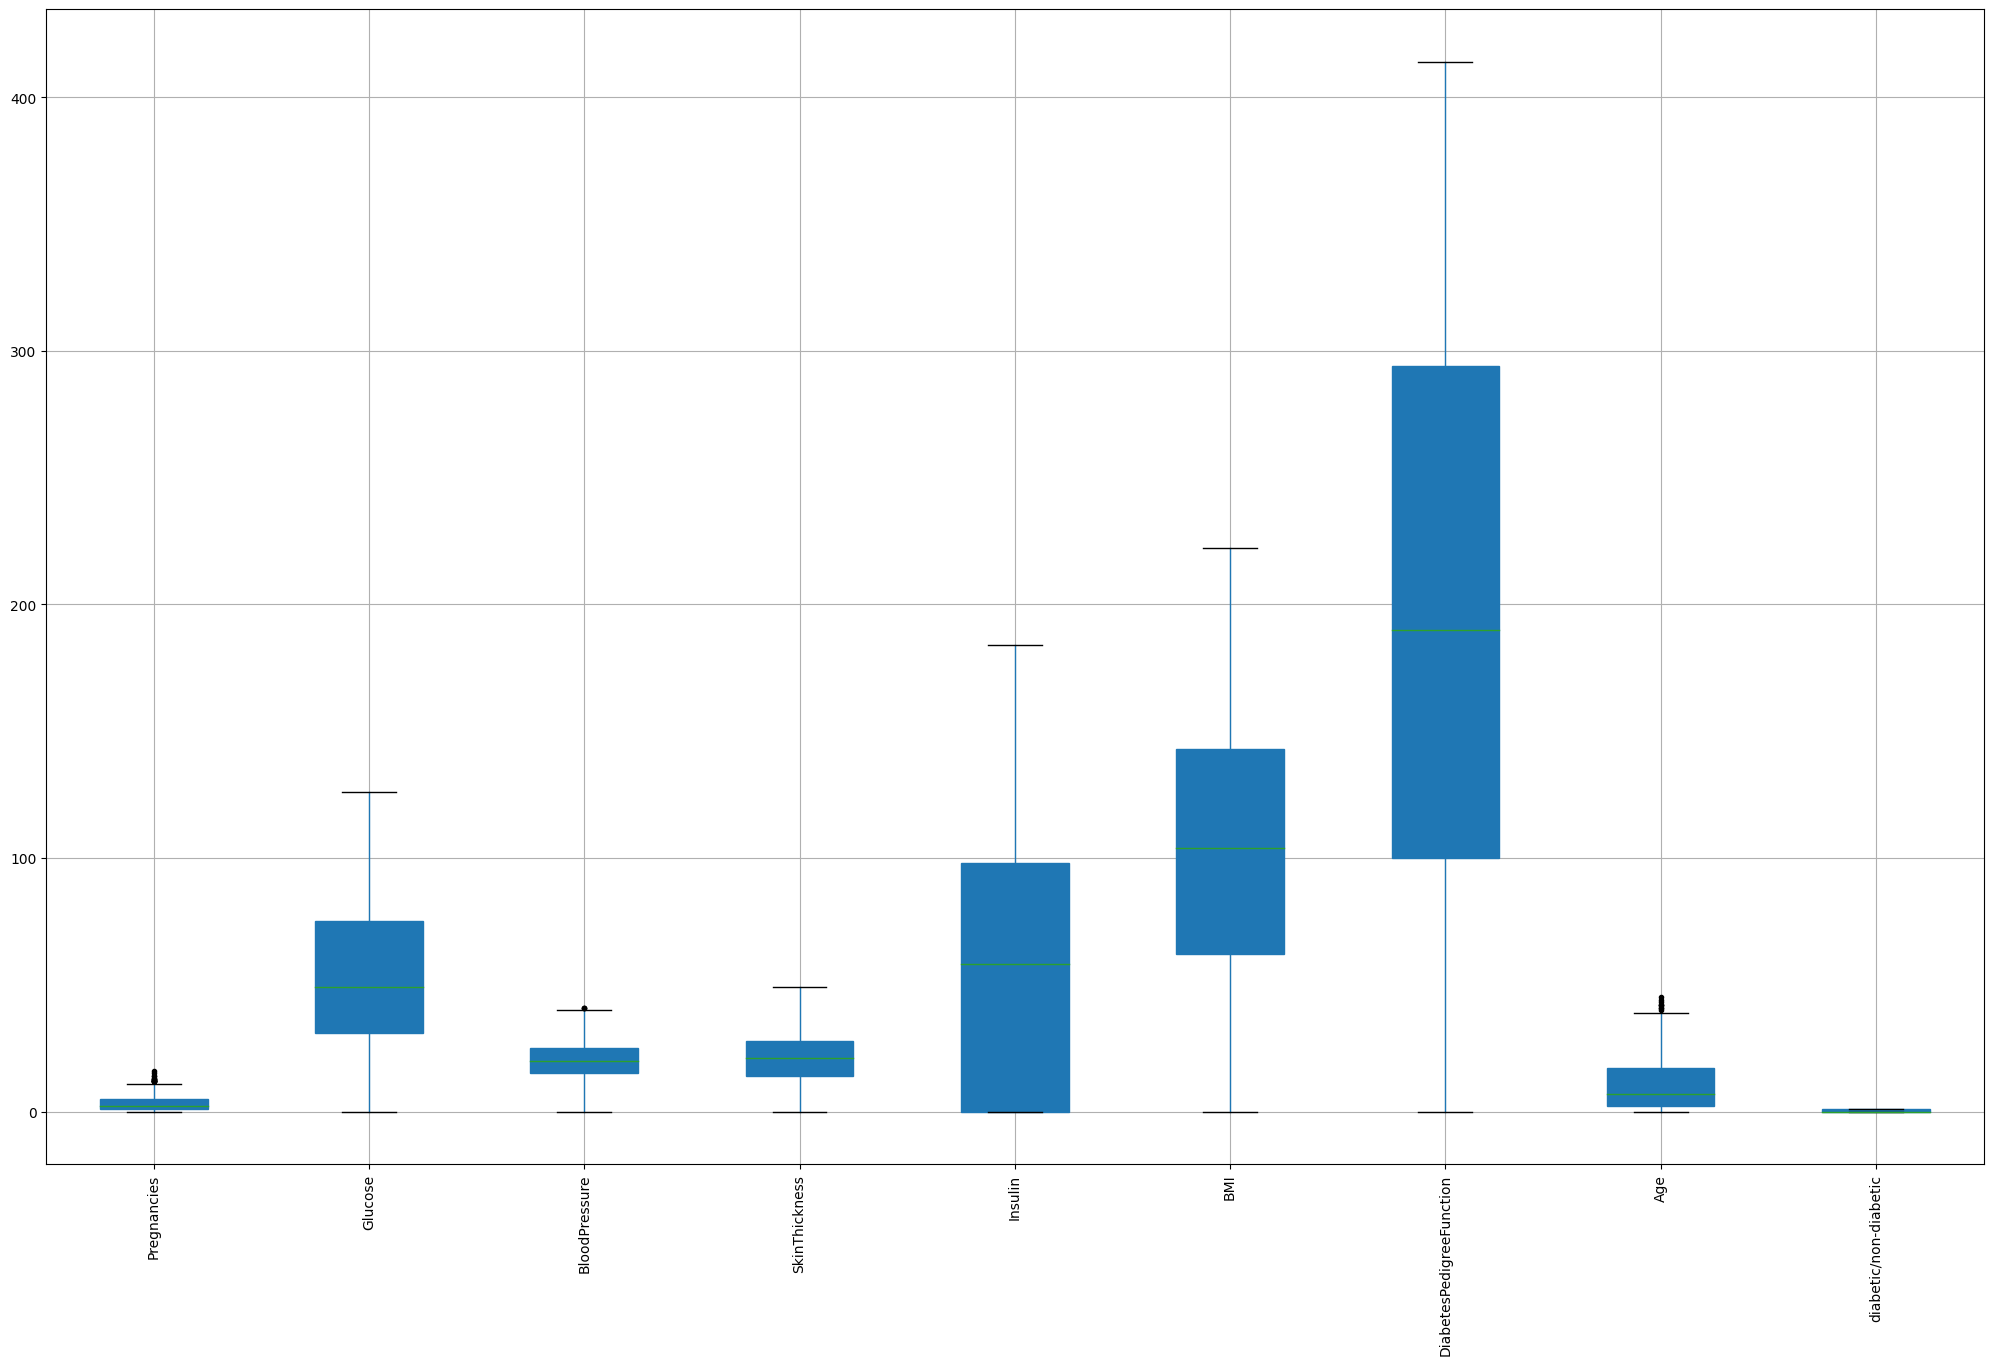

In [ ]:
plt.subplots(figsize=(25,15))
dataset.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

<Axes: >

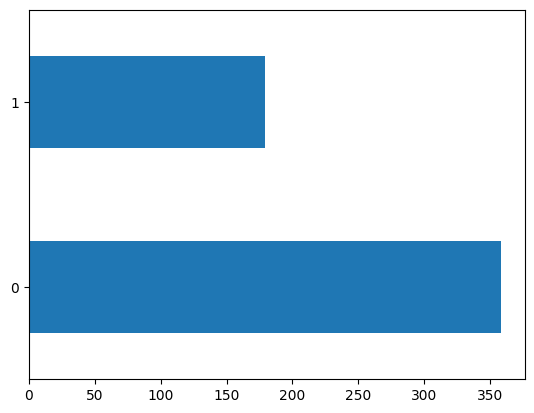

In [ ]:
dataset["diabetic/non-diabetic"].value_counts().sort_index().plot.barh()

In [ ]:

def pima_data_prep(df = None, do_balance = False):
    X = df.drop(["diabetic/non-diabetic"], axis = 1)
    y = df["diabetic/non-diabetic"]

    if do_balance:
        # transform the dataset
        oversample = SMOTE(random_state=123)
        X, y = oversample.fit_resample(X, y)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 123)

    return X, y ,X_train, X_test, y_train, y_test

In [ ]:
# Utility function to train and evaluate a model on PIMA dataset
def train_and_evaluate_model(model,X,y, verbose=False, n_splits=10):
    acc = 0
    auc = 0
    f1 = 0
    prec = 0
    recall = 0

    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=123)

    start_time = time.time()
    for train_index, test_index in sss.split(X, y):
        if X is pd.DataFrame:
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        else:
            X_train, X_test = X[train_index], X[test_index]

        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc1 = accuracy_score(y_test, y_pred)
        auc1 = roc_auc_score(y_test, y_pred, average="macro")
        f11 = f1_score(y_test, y_pred, average="macro")
        prec1 = precision_score(y_test, y_pred, average="macro")
        recall1 = recall_score(y_test, y_pred, average="macro")
        if verbose:
            print ('acc', acc1)
            print('f1', f11)
            print('recall1', recall1)
            print('auc1', auc1)
        acc += acc1
        auc += auc1
        f1 += f11
        prec += prec1
        recall += recall1

    spent_time = time.time() - start_time
    print("Acc      F-Meas   Precis   Recall   AUC      Time")
    print("%.04f\t%.04f\t%.04f\t%.04f\t%.04f\t%0.4f" % (acc/n_splits, f1/n_splits, prec/n_splits,
                                            recall/n_splits, auc/n_splits, spent_time))


In [ ]:

# Create tuned model for RF
rf_tuned_nofs_nobl = RandomForestClassifier(max_depth = 5,  max_features = None,
                        criterion = 'entropy', n_estimators = 100, random_state=123)
# Create tuned model for Xgboost Classifier
xgb_tuned_nofs_nobl = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100,
                                    subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,
                                    random_state=123)
# Create a tuned model for GradientBoostingClassifier
gbc_tuned_nofs_nobl = GradientBoostingClassifier(max_depth=2, n_estimators=100, random_state=123)
# Create tuned model for SVM
svm_tuned_nofs_nobl = SVC(C = 1, kernel = 'linear', max_iter = 1000, random_state=123)
# Define the hyperparameters for tuning
max_depth = 10
min_samples_split = 5
min_samples_leaf = 4
criterion = 'entropy'

# Create the decision tree model with tuned hyperparameters
dt_tuned_nofs_nobl = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   random_state=123)
# Create tuned model for Extra Tree Classifier
et_tuned_nofs_nobl = ExtraTreesClassifier(max_depth = 5,  max_features = None,
                        criterion = 'entropy', n_estimators = 100, random_state=123)
# Create tuned model for LR
lr_tuned_nofs_nobl = LogisticRegression(C = 16, solver = 'lbfgs', max_iter = 200, random_state=123)
# Create a tuned model for AdaBoostClassifier
ada_tuned_nofs_nobl = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=123)
# Voting Classifier without weights




In [ ]:

# Prepare dataset with No feature Selection No balancing
X,y, X_train, X_test, y_train, y_test = pima_data_prep(dataset, do_balance=False)

#  Train and evaluate the Random Forest Model
train_and_evaluate_model(rf_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the XgBoost Model
train_and_evaluate_model(xgb_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the gradientBoost Model
train_and_evaluate_model(gbc_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the SVM Model
train_and_evaluate_model(svm_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the Decision Tree  Model
train_and_evaluate_model(dt_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the Extra Tree  Model
train_and_evaluate_model(et_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the Linear Regression  Model
train_and_evaluate_model(lr_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the AdaBoost Model
train_and_evaluate_model(ada_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the Voting Clasifier
train_and_evaluate_model(ada_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the Voting Clasifier
#train_and_evaluate_model(vc, X, y, verbose=False)

Acc      F-Meas   Precis   Recall   AUC      Time
0.7747	0.7351	0.7552	0.7273	0.7273	2.1238
Acc      F-Meas   Precis   Recall   AUC      Time
0.7698	0.7342	0.7445	0.7292	0.7292	0.4699
Acc      F-Meas   Precis   Recall   AUC      Time
0.7617	0.7206	0.7388	0.7139	0.7139	0.7908
Acc      F-Meas   Precis   Recall   AUC      Time
0.7636	0.7165	0.7408	0.7065	0.7065	0.0750
Acc      F-Meas   Precis   Recall   AUC      Time
0.7142	0.6715	0.6783	0.6694	0.6694	0.0755
Acc      F-Meas   Precis   Recall   AUC      Time
0.7673	0.7157	0.7503	0.7042	0.7042	0.9304
Acc      F-Meas   Precis   Recall   AUC      Time
0.7679	0.7271	0.7431	0.7190	0.7190	0.0905
Acc      F-Meas   Precis   Recall   AUC      Time
0.7599	0.7083	0.7380	0.6986	0.6986	1.3883
Acc      F-Meas   Precis   Recall   AUC      Time
0.7599	0.7083	0.7380	0.6986	0.6986	1.3723


In [ ]:
# Do prediction (example) with the trained model
y_pred_ran = rf_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_ran)
auc1 = roc_auc_score(y_test, y_pred_ran, average="macro")
f11 = f1_score(y_test, y_pred_ran, average="macro")
prec1 = precision_score(y_test, y_pred_ran, average="macro")
recall1 = recall_score(y_test, y_pred_ran, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.8703703703703703
f1 0.8534820621043111
recall1 0.8461927223719676
auc1 0.8461927223719676
precision 0.8630100688924218


In [ ]:
# Do prediction (example) with the trained model
y_pred_xgb = xgb_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_xgb)
auc1 = roc_auc_score(y_test, y_pred_xgb, average="macro")
f11 = f1_score(y_test, y_pred_xgb, average="macro")
prec1 = precision_score(y_test, y_pred_xgb, average="macro")
recall1 = recall_score(y_test, y_pred_xgb, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.9259259259259259
f1 0.9166666666666667
recall1 0.9097035040431267
auc1 0.9097035040431267
precision 0.9251748251748252


In [ ]:
# Do prediction (example) with the trained model
y_pred_gbc = gbc_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_gbc)
auc1 = roc_auc_score(y_test, y_pred_gbc, average="macro")
f11 = f1_score(y_test, y_pred_gbc, average="macro")
prec1 = precision_score(y_test, y_pred_gbc, average="macro")
recall1 = recall_score(y_test, y_pred_gbc, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.8580246913580247
f1 0.8363133154680842
recall1 0.8241239892183289
auc1 0.824123989218329
precision 0.8559666975023127


In [ ]:
# Do prediction (example) with the trained model
y_pred_svm = svm_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_svm)
auc1 = roc_auc_score(y_test, y_pred_svm, average="macro")
f11 = f1_score(y_test, y_pred_svm, average="macro")
prec1 = precision_score(y_test, y_pred_svm, average="macro")
recall1 = recall_score(y_test, y_pred_svm, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)


acc 0.7654320987654321
f1 0.7309440559440559
recall1 0.7238881401617251
auc1 0.7238881401617252
precision 0.7428728070175439


In [ ]:
# Do prediction (example) with the trained model
y_pred_dt = dt_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_dt)
auc1 = roc_auc_score(y_test, y_pred_dt, average="macro")
f11 = f1_score(y_test, y_pred_dt, average="macro")
prec1 = precision_score(y_test, y_pred_dt, average="macro")
recall1 = recall_score(y_test, y_pred_dt, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.8641975308641975
f1 0.8457676994980095
recall1 0.8372641509433962
auc1 0.8372641509433962
precision 0.8574999999999999


In [ ]:
# Do prediction (example) with the trained model
y_pred_et = et_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_et)
auc1 = roc_auc_score(y_test, y_pred_et, average="macro")
f11 = f1_score(y_test, y_pred_et, average="macro")
prec1 = precision_score(y_test, y_pred_et, average="macro")
recall1 = recall_score(y_test, y_pred_et, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.8271604938271605
f1 0.7975000000000001
recall1 0.7836927223719676
auc1 0.7836927223719676
precision 0.8243451463790448


In [ ]:
# Do prediction (example) with the trained model
y_pred_lr = lr_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_lr)
auc1 = roc_auc_score(y_test, y_pred_lr, average="macro")
f11 = f1_score(y_test, y_pred_lr, average="macro")
prec1 = precision_score(y_test, y_pred_lr, average="macro")
recall1 = recall_score(y_test, y_pred_lr, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.7962962962962963
f1 0.7675146771037182
recall1 0.7601078167115903
auc1 0.7601078167115902
precision 0.7788513635542713


In [ ]:
# Do prediction (example) with the trained model
y_pred_ada = ada_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_ada)
auc1 = roc_auc_score(y_test, y_pred_ada, average="macro")
f11 = f1_score(y_test, y_pred_ada, average="macro")
prec1 = precision_score(y_test, y_pred_ada, average="macro")
recall1 = recall_score(y_test, y_pred_ada, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)

acc 0.8209876543209876
f1 0.7914132220396928
recall1 0.7789757412398922
auc1 0.7789757412398922


Confusion Matrix:
[[102   4]
 [  8  48]]


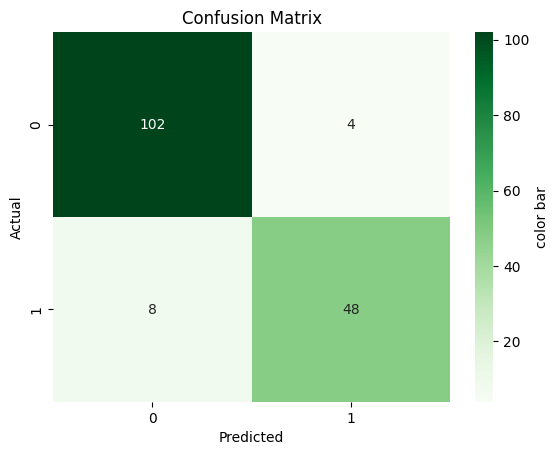

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, cmap="Greens", annot=True, fmt='d',  # Set the format to display as integer
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix:
[[98  8]
 [13 43]]


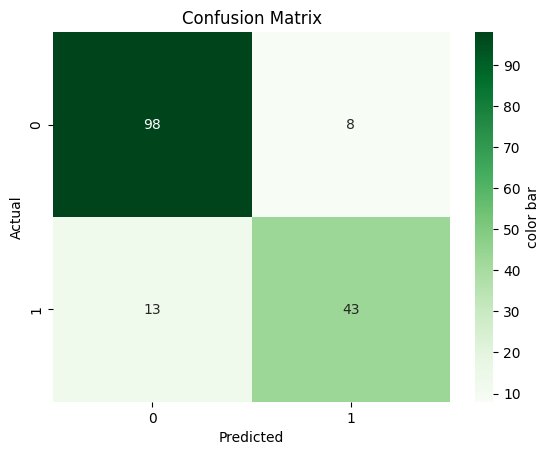

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_ran, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, cmap="Greens", annot=True, fmt='d',  # Set the format to display as integer
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
[[98  8]
 [14 42]]


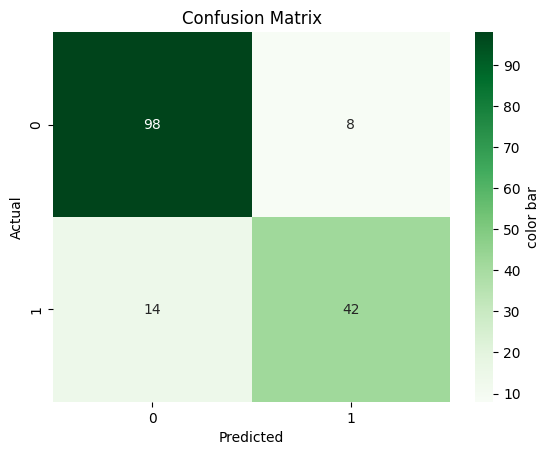

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, cmap="Greens", annot=True, fmt='d',  # Set the format to display as integer
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
[[91 15]
 [23 33]]


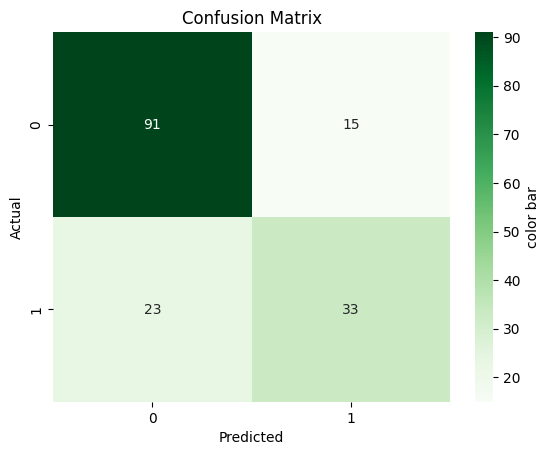

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, cmap="Greens", annot=True, fmt='d',  # Set the format to display as integer
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
[[98  8]
 [13 43]]


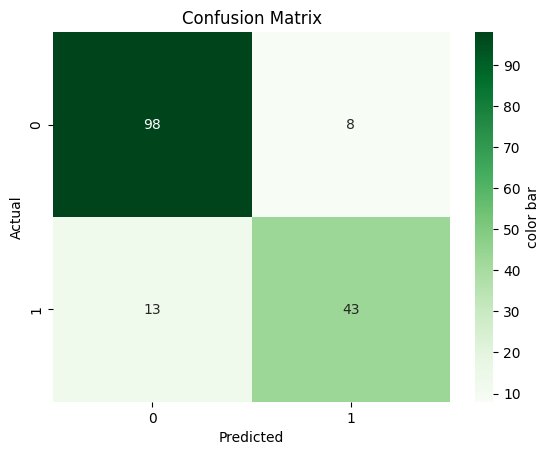

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_ran, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix as a heatmap
sns.heatmap(cm, cmap="Greens", annot=True, fmt='d',  # Set the format to display as integer
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
[[102   4]
 [  8  48]]


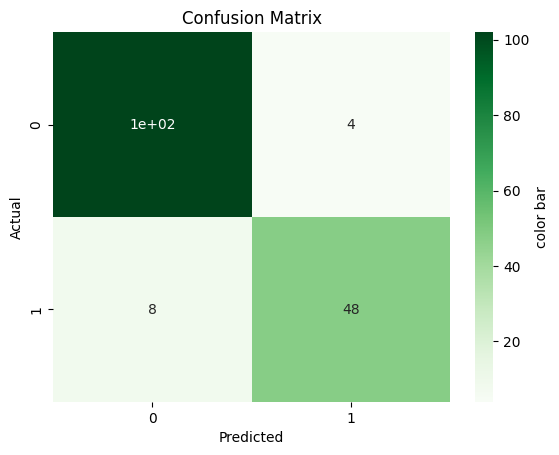

In [ ]:
cm=confusion_matrix(y_test,y_pred_xgb,labels=[0,1])
print("Confusion Matrix:")
print(cm)
# --- ---- ---- heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Select a test data point for which you want to generate SHAP values
test_data_index = 0  # Replace with the index of the test data point you want to explain
test_data_point = X_test[test_data_index:test_data_index+1]  # Extract the single test data point

# Initialize the SHAP explainer with the trained model and dataset
explainer = shap.TreeExplainer(rf_tuned_nofs_nobl)
shap_values = explainer.shap_values(test_data_point)

# Display the SHAP force plot for the test data point
shap.initjs()  # Ensure that JavaScript is initialized for the visualization
shap.force_plot(explainer.expected_value[1], shap_values[1][test_data_index], test_data_point, feature_names=feature_names)

NameError: ignored

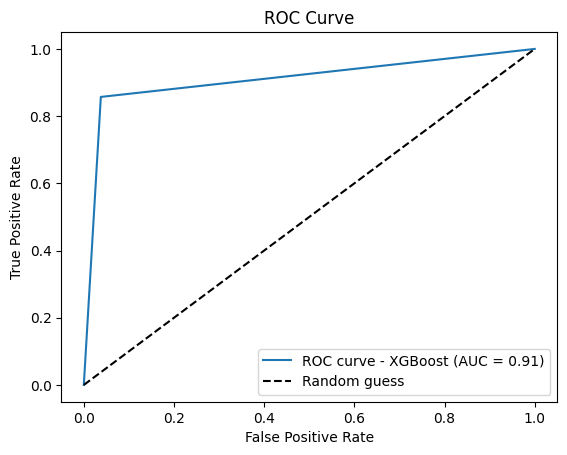

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_pred_xgb)

plt.plot(fpr, tpr, label='ROC curve - XGBoost (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


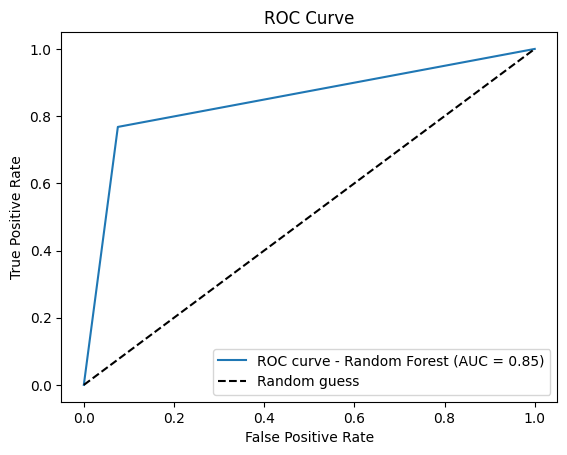

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ran)
auc = roc_auc_score(y_test, y_pred_ran)

plt.plot(fpr, tpr, label='ROC curve - Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


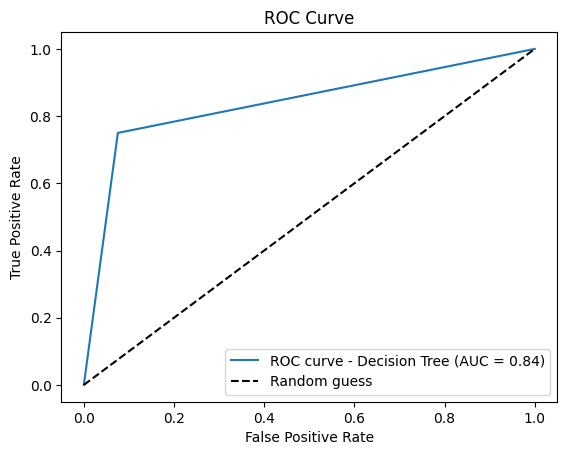

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
auc = roc_auc_score(y_test, y_pred_dt)

plt.plot(fpr, tpr, label='ROC curve - Decision Tree (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


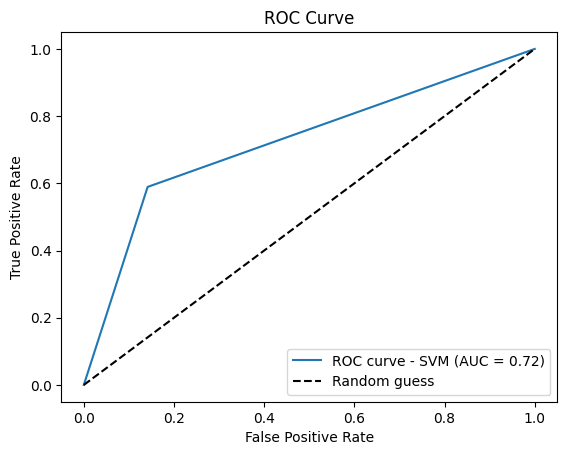

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
auc = roc_auc_score(y_test, y_pred_svm)

plt.plot(fpr, tpr, label='ROC curve - SVM (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


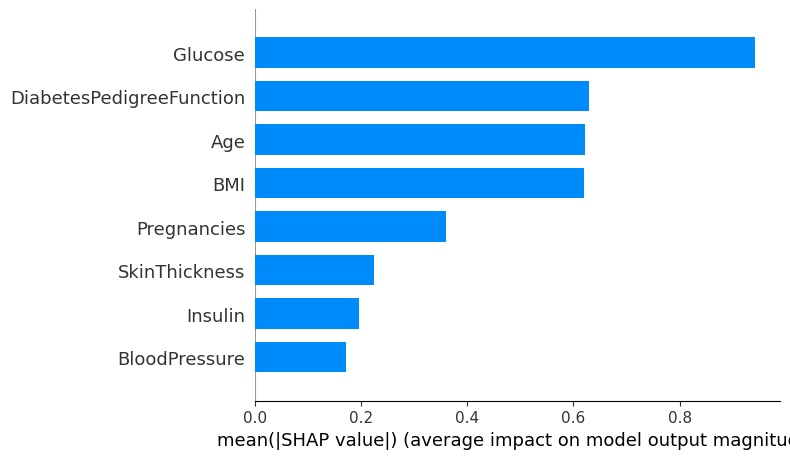

In [ ]:
feature_names = dataset.columns[:-1].tolist()
explainer = shap.TreeExplainer(xgb_tuned_nofs_nobl)
shap_values = explainer.shap_values(X_test)
# plot SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)



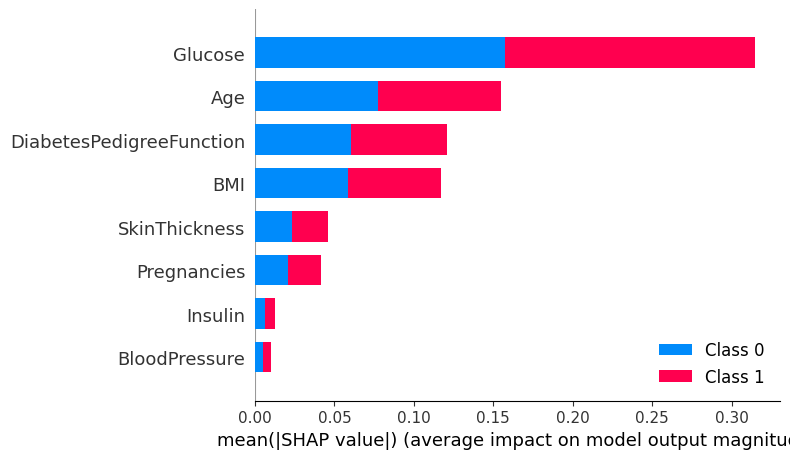

In [ ]:
feature_names = dataset.columns[:-1].tolist()
explainer = shap.TreeExplainer(rf_tuned_nofs_nobl)
shap_values = explainer.shap_values(X_test)
# plot SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

In [ ]:
#newwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
# Select a test data point for which you want to generate SHAP values
test_data_index = 0  # Replace with the index of the test data point you want to explain
test_data_point = X_test[test_data_index:test_data_index+1]  # Extract the single test data point

# Initialize the SHAP explainer with the trained model and dataset
explainer = shap.TreeExplainer(rf_tuned_nofs_nobl)
shap_values = explainer.shap_values(test_data_point)

# Display the SHAP force plot for the test data point
shap.initjs()  # Ensure that JavaScript is initialized for the visualization
shap.force_plot(explainer.expected_value[1], shap_values[1][test_data_index], test_data_point, feature_names=feature_names)

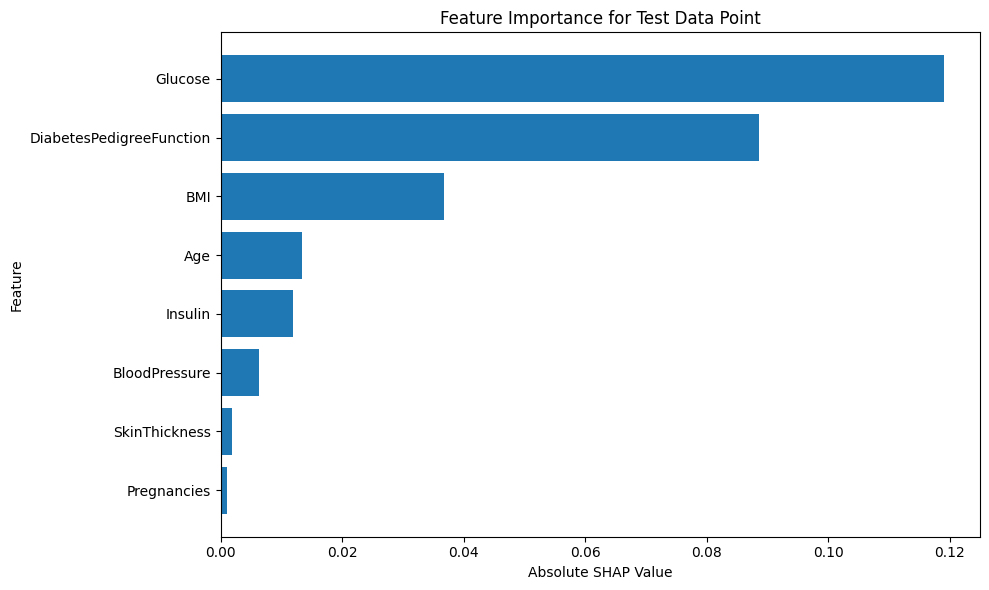

In [ ]:

# ... (data preparation, model training, etc.)

# Select a test data point for which you want to generate SHAP values
test_data_index = 0  # Replace with the index of the test data point you want to explain
test_data_point = X_test[test_data_index:test_data_index+1]  # Extract the single test data point

# Initialize the SHAP explainer with the trained model and dataset
explainer = shap.TreeExplainer(rf_tuned_nofs_nobl)
shap_values = explainer.shap_values(test_data_point)

# Calculate the absolute SHAP values to get feature importance
abs_shap_values = np.abs(shap_values[1][0])

# Get feature names
feature_names = dataset.columns.tolist()

# Sort features and SHAP values in descending order of importance
sorted_idx = np.argsort(abs_shap_values)
sorted_features = np.array(feature_names)[sorted_idx]
sorted_shap_values = abs_shap_values[sorted_idx]

# Plot the feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_shap_values, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Test Data Point')
plt.tight_layout()
plt.show()

In [ ]:
explainer = LimeTabularExplainer(training_data=X_train, mode="classification", training_labels=y_train, feature_names=feature_names)
explanation = explainer.explain_instance(test_data_point[0], rf_tuned_nofs_nobl.predict_proba)
explanation.show_in_notebook()

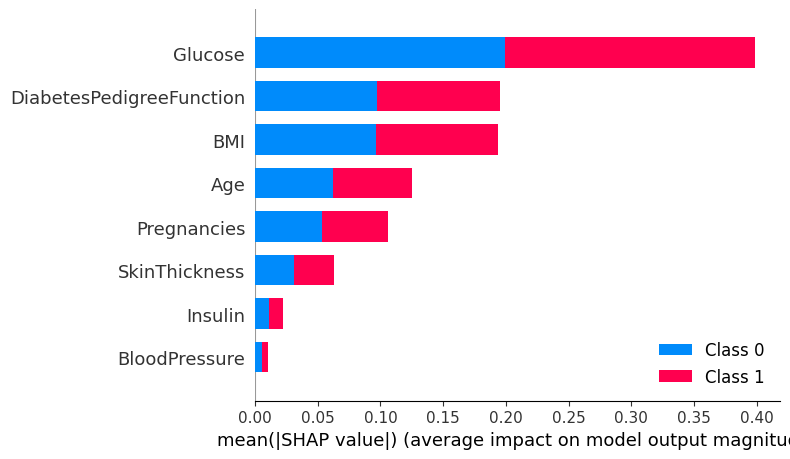

In [ ]:
feature_names = dataset.columns[:-1].tolist()
explainer = shap.TreeExplainer(dt_tuned_nofs_nobl)
shap_values = explainer.shap_values(X_test)
# plot SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

In [ ]:
feature_names = dataset.columns[:-1].tolist()
explainer = shap.TreeExplainer(svm_tuned_nofs_nobl)
shap_values = explainer.shap_values(X_test)
# plot SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

InvalidModelError: ignored

In [ ]:
from lime import lime_tabular
import numpy as np

categorical_features = [0]  # Specify the categorical feature indices

explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), mode="regression",
                                              feature_names=X_train.columns,
                                              categorical_features=categorical_features)
exp = explainer.explain_instance(data_row=X_test.iloc[4], predict_fn=xgb_tuned_nofs_nobl.predict_proba)
exp.show_in_notebook(show_table=True)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train, feature_names=dataset.columns[:-1], class_names=['non-diabetic', 'diabetic'])
explanation = explainer.explain_instance(X_test[0], xgb_tuned_nofs_nobl.predict_proba)
print('Prediction probabilities:', xgb_tuned_nofs_nobl.predict_proba([X_test[0]])[0])


feature_values_table = pd.DataFrame([X_test[0]], columns=dataset.columns[:-1])
print('Feature values:')
print(feature_values_table.to_string(index=False))




Prediction probabilities: [0.87992543 0.12007456]
Feature values:
 Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction      Age
      0.1875 0.293651       0.487805        0.44898      0.5 0.27027                  0.777778 0.133333


Prediction probabilities: [0.87992543 0.12007456]
Top features that contribute to the prediction:
BMI <= 0.28: -0.206
DiabetesPedigreeFunction > 0.70: 0.143
0.23 < Glucose <= 0.38: -0.133
0.04 < Age <= 0.13: -0.040
0.46 < BloodPressure <= 0.59: -0.015
0.12 < Pregnancies <= 0.31: 0.015
0.43 < SkinThickness <= 0.57: 0.014
0.31 < Insulin <= 0.53: -0.007
Feature values:
   Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
0       0.1875  0.293651       0.487805        0.44898      0.5  0.27027   

   DiabetesPedigreeFunction       Age  
0                  0.777778  0.133333  


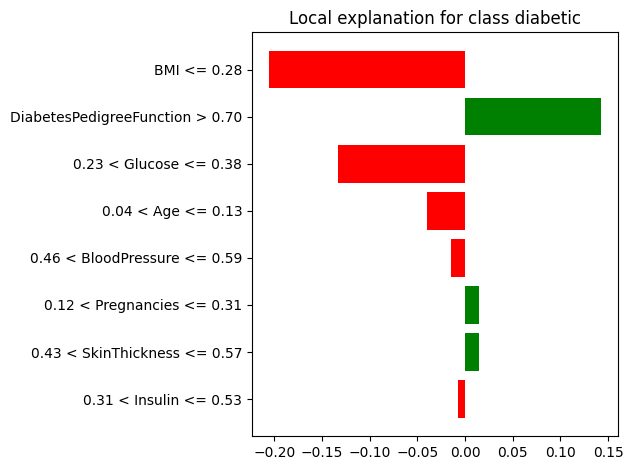

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train, feature_names=dataset.columns[:-1], class_names=['non-diabetic', 'diabetic'])
explanation = explainer.explain_instance(X_test[0], xgb_tuned_nofs_nobl.predict_proba)
print('Prediction probabilities:', xgb_tuned_nofs_nobl.predict_proba([X_test[0]])[0])
print('Top features that contribute to the prediction:')
for feature, weight in explanation.as_list():
    print('{}: {:.3f}'.format(feature, weight))

feature_values_table = pd.DataFrame([X_test[0]], columns=dataset.columns[:-1])
print('Feature values:')
print(feature_values_table)

fig = explanation.as_pyplot_figure()
fig.tight_layout()
plt.show()


In [ ]:
explainer = LimeTabularExplainer(X_train, feature_names = dataset.columns[:-1], class_names=['non-diabetic', 'diabetic'])


In [ ]:
explanation = explainer.explain_instance(X_test[0], xgb_tuned_nofs_nobl.predict_proba)



In [ ]:
print('Top features that contribute to the prediction:')
for feature, weight in explanation.as_list():
    print('{}: {:.3f}'.format(feature, weight))


Top features that contribute to the prediction:
BMI <= 0.28: -0.183
DiabetesPedigreeFunction > 0.70: 0.147
0.23 < Glucose <= 0.38: -0.134
0.04 < Age <= 0.13: -0.036
0.46 < BloodPressure <= 0.59: -0.032
0.43 < SkinThickness <= 0.57: 0.007
0.31 < Insulin <= 0.53: 0.004
0.12 < Pregnancies <= 0.31: 0.001


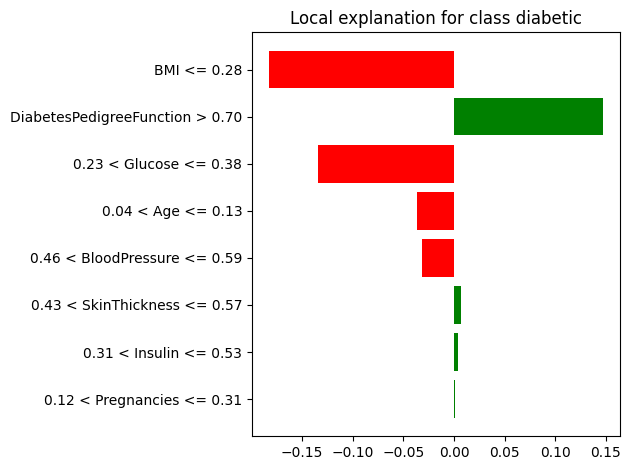

In [ ]:
fig = explanation.as_pyplot_figure()
fig.tight_layout()


In [ ]:
!pip install -U shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.TreeExplainer(xgb_tuned_nofs_nobl)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Plot SHAP force plot with feature names
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_df.iloc[0], feature_names=feature_names)
plt.show()


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
explainer = shap.TreeExplainer(rf_tuned_nofs_nobl)
shap_values = explainer.shap_values(X_test)
# plot SHAP force plot with feature names
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test[0], feature_names=feature_names)


In [ ]:
!pip install --upgrade scikit-learn
!pip install -U scikit-learn
!pip install scikit-learn==0.22



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 48.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.22-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.22 which is incompatible.
lightgbm 3.3.5 requires scikit-learn!=0.22.0, but you have scikit-learn 0.22 which is incompatible.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, but you have scikit-learn 0.22 which is incompatible.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.2

In [ ]:
!pip install scikit-learn==0.21.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit-learn-0.21.3.tar.gz (12.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


ValueError: ignored

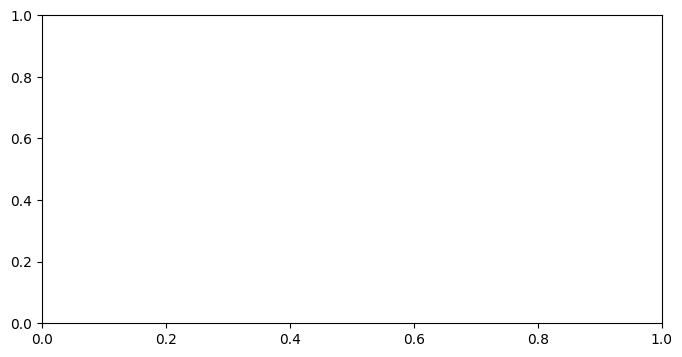

In [ ]:
from sklearn.inspection import plot_partial_dependence

# Prepare dataset with No feature Selection No balancing
X,y, X_train, X_test, y_train, y_test = pima_data_prep(dataset, do_balance=False)

#  Train and evaluate the Random Forest Model
xgb_tuned_nofs_nobl.fit(X_train, y_train)

# Create PDP plot for glucose feature
fig, ax = plt.subplots(figsize=(8, 4))
plot_partial_dependence(xgb_tuned_nofs_nobl, X_train, features=["glucose"], ax=ax)
plt.ylabel("Average Predicted Probability")
plt.xlabel("Glucose")
plt.title("Partial Dependence Plot for Glucose")
plt.tight_layout()
plt.show()


In [ ]:
import sklearn
print(sklearn.__version__)
